## dataframe 数据结构

        在上一章中，我们详细介绍了NumPy和它的ndarray对象，这个对象为Python多维数组提供了高效的存储和处理方法。下面，我们将基于前面的知识，深入学习Pandas程序库提供的数据结构。Pandas是在NumPy基础上建立的新程序库，提供了一种高效的DataFrame数据结构。DataFrame本质上是一种带行标签和列标签、支持相同类型数据和缺失值的多维数组。Pandas不仅为带各种标签的数据提供了便利的存储界面，还实现了许多强大的操作，这些操作对数据库框架和电子表格程序的用户来说非常熟悉。
        
       尤其是它的Series和DataFrame对象，为数据科学家们处理那些消耗大量时间的“数据清理”（data munging） 
       
       因此，在深入学习Pandas之前，先来看看Pandas的三个基本数据结构：Series、DataFrame和Index。

In [1]:
import pandas as pd
pd.__version__

'0.23.4'

### Pandas的Series对象

- Pandas的Series对象是一个带索引数据构成的一维数组。可以用一个数组创建Series对象

In [4]:
import pandas as pd
import numpy as np
data = pd.Series([0.25,0.5,0.75,1.0])
data

# Serise 对象将一组数据和一组索引帮在一起 ，我们可以通过values
# 属性和index属性获取数据。values属性返回的结果与Numpy数组类似：

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [5]:
# 通过values属性返回的结果与Numpy数组类似
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [6]:
# index属性返回的结果是一个类型为pd.index的类数据对象
data.index

RangeIndex(start=0, stop=4, step=1)

In [7]:
# 和Numpy数组一样，数据可以通过Python的中括号索引标签获取

data[1]

0.5

In [8]:
data[1:3]
# 但是我们将会看到，Pandas的Series对象比它模仿的一维NumPy数组更加通用、灵活。

1    0.50
2    0.75
dtype: float64

### Serise 是通用的Numpy数组


        到目前为止，我们可能觉得Series对象和一维NumPy数组基本可以等价交换，但两者间的本质差异其实是索引：NumPy数组通过隐式定义的整数索引获取数值，而Pandas的Series对象用一种显式定义的索引与数值关联。
        显式索引的定义让Series对象拥有了更强的能力。例如，索引不再仅仅是整数，还可以是任意想要的类型。如果需要，完全可以用字符串定义索引：


In [9]:
import pandas as pd
data = pd.Series([0.25,0.5,0.75,1.0],index=['a','b','c','d'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [10]:
data['b']

0.5

In [11]:
# 也可使用不连续或不按顺序的索引
data = pd.Series([0.25,0.5,0.75,1.0],index=[2,5,7,9])
data

2    0.25
5    0.50
7    0.75
9    1.00
dtype: float64

In [12]:
data[7]

0.75

## Series 是特殊的字典

    你可以把Pandas的Series对象看成一种特殊的Python字典。字典是一种将任意键映射到一组任意值的数据结构，而Series对象其实是一种将类型键映射到一组类型值的数据结构。类型至关重要：就像NumPy数组背后特定类型的经过编译的代码使得它在某些操作上比普通的Python列表更加高效一样，PandasSeries的类型信息使得它在某些操作上比Python的字典更高效。我们可以直接用Python的字典创建一个Series对象，让Series对象与字典的类比更加清晰：

In [13]:
import pandas as pd
population_dict = {'California': 38332521,
                           'Texas': 26448193,
                           'New York': 19651127,
                           'Florida': 19552860,
                           'Illinois': 12882135}
population = pd.Series(population_dict)
population

# 用字典创建Series对象时，其索引默认按照顺序排列。典型的字典数值获取方式仍然有效：

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [14]:
population['New York']

19651127

In [15]:
# 和字典不同，Series对象还支持数组形式的操作，比如切片：
population['California':"Florida"]

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
dtype: int64

In [16]:
import numpy as np
import pandas as pd
pd.Series([2,4,6])


0    2
1    4
2    6
dtype: int64

In [17]:
# data 也可以是一个标量，创建Series对象时会重复填充到每个索引上
pd.Series(5,index=[100,200,300])


100    5
200    5
300    5
dtype: int64

In [18]:
# data还是一个字典，index默认是排序的字典键
pd.Series({2:"a",1:"b",3:"c"})

2    a
1    b
3    c
dtype: object

In [1]:
# 制定series默认的缺失值
import pandas as pd
obj = pd.Series([4.5,7.2,-5.3,3.6],index=['d','b','a','c'])
print(obj)

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64


In [3]:
obj2=obj.reindex(["a","b","c","d","e"],fill_value = 0)
print(obj2)

a   -5.3
b    7.2
c    3.6
d    4.5
e    0.0
dtype: float64


In [6]:
# 重指定索引并制定元素的填充方法
import pandas as pd
obj3=pd.Series(["blue","purple","yellow"],index=[0,2,4])
print(obj3)

0      blue
2    purple
4    yellow
dtype: object


In [8]:
obj4=obj3.reindex(range(6),method="ffill")
print(obj4)

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object


## Pandas 的 DataFrame对象

    Pandas的另一个基础数据结构是DataFrame。和上一节介绍的Series对象一样，DataFrame既可以作为一个通用型NumPy数组，也可以看作特殊的Python字典。下面来分别看看。
    
- dataframe 是通用的Numpy数组

        如果将Series类比为带灵活索引的一维数组，那么DataFrame就可以看作是一种既有灵活的行索引，又有灵活列名的二维数组。就像你可以把二维数组看成是有序排列的一维数组一样，你也可以把DataFrame看成是有序排列的若干Series对象。这里的“排列”指的是它们拥有共同的索引。

###  可以输入给DataFrame构造器的数据
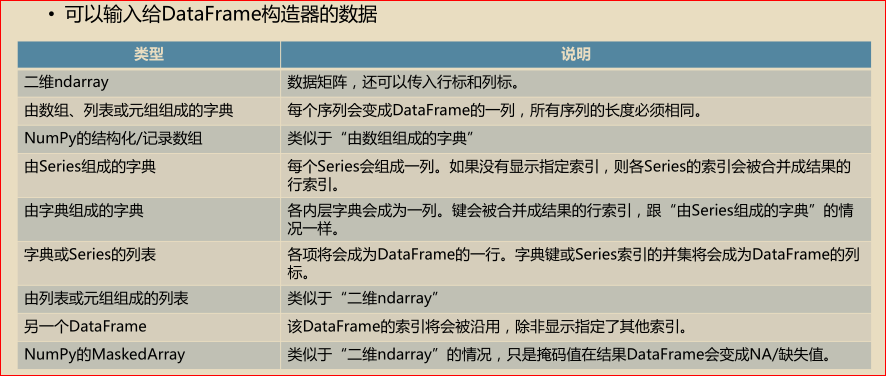

In [20]:
# 下面用上一节中美国五个州面积的数据创建一个新的Series来进行演示：
import numpy as np
import pandas as pd
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [21]:
states = pd.DataFrame({"population":population,"area":area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [23]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [24]:
states.columns
#因此DataFrame可以看作一种通用的NumPy二维数组，它的行与列都可以通过索引获取。

Index(['population', 'area'], dtype='object')

### 2. DataFrame是特殊的字典

    与Series类似，我们也可以把DataFrame看成一种特殊的字典。字典是一个键映射一个值，而DataFrame是一列映射一个Series的数据。例如，通过'area'的列属性可以返回包含面积数据的Series对象：

In [25]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

# 创建DataFrame对象

In [26]:
# 通过单个的Series对象创建 DataFrame是一组Series对象的集合，可以用单个Series创建一个单列的DataFrame：
import pandas as pd
pd.DataFrame(population,columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [28]:
import pandas as pd
pd.DataFrame({'population':population})

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [31]:
# 2.0 通过字典列表创建
data = [{'a': i, 'b': 2 * i}
                for i in range(3)]
pd.DataFrame(data,index=['x','y','z'])

,a,b
x,0,0
y,1,2
z,2,4


In [32]:
# 即使字典中有些键不存在，Pandas也会用缺失值NaN（不是数字，not a number）来表示：

pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [35]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])
# 通过Series对象字典创建 DataFrame也可以用一个由Series对象构成的字典创建：
pd.DataFrame({'population':population,"area":area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [36]:
# 4.0通过NumPy二维数组创建。假如有一个二维数组，就可以创建一个可以指定行列索引值的DataFrame。如果不指定行列索引值，那么行列默认都是整数索引值：
pd.DataFrame(np.random.rand(3,2),columns = ["foo","bar"],index = ["a","b","c"])

,foo,bar
a,0.200357,0.554439
b,0.325058,0.546009
c,0.776931,0.610582


In [37]:
# （5）通过NumPy结构化数组创建。2.9节曾介绍过结构化数组。由于Pandas的DataFrame与结构化数组十分相似，因此可以通过结构化数组创建DataFrame：

A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [38]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


## pandas 的index对象

- 我们已经发现，Series和DataFrame对象都使用便于引用和调整的显式索引。Pandas的Index对象是一个很有趣的数据结构，可以将它看作是一个不可变数组或有序集合（实际上是一个多集，因为Index对象可能会包含重复值）。这两种观点使得Index对象能呈现一些有趣的功能

In [40]:
# 让我们用一个简单的整数列表来创建一个Index对象
import pandas as pd
ind = pd.Index([2,3,5,7,11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [41]:
# 1. 将Index看作不可变数组  Index对象的许多操作都像数组。例如，可以通过标准Python的取值方法获取数值，也可以通过切片获取数值：

ind[1]

3

In [42]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [44]:
# Index对象还有许多与NumPy数组相似的属性
print(ind.size,ind.shape,ind.ndim,ind.dtype)


5 (5,) 1 int64


In [45]:
# Index对象与NumPy数组之间的不同在于，Index对象的索引是不可变的，也就是说不能通过通常的方式进行调整：
ind[1] = 0

#  Index对象的不可变特征使得多个DataFrame和数组之间进行索引共享时更加安全，尤其是可以避免因修改索引时粗心大意而导致的副作用。


TypeError: Index does not support mutable operations

### 2. 将Index看作有序集合

- Pandas对象被设计用于实现许多操作，如连接（join）数据集，其中会涉及许多集合操作。Index对象遵循Python标准库的集合（set）数据结构的许多习惯用法，包括并集、交集、差集等：

In [47]:
import pandas as pd
indA = pd.Index([1,3,5,7,9])
indB = pd.Index([2,3,5,7,11])

indA&indB # 交集

Int64Index([3, 5, 7], dtype='int64')

In [48]:
indA|indB  # 并集

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [49]:
indA^indB  # 异或 差集

# 这些操作还可以通过调用对象方法来实现，例如indA.intersection(indB)。


Int64Index([1, 2, 9, 11], dtype='int64')

## 3.3　数据取值与选择

- 第2章具体介绍了获取、设置、调整NumPy数组数值的方法与工具，包括取值操作（如arr[2, 1]）、切片操作（如arr[:, 1:5]）、掩码操作（如arr[arr > 0]）、花哨的索引操作（如arr[0, [1, 5]]），以及组合操作（如arr[:, [1, 5]]）。下面介绍Pandas的Series和DataFrame对象相似的数据获取与调整操作。如果你用过NumPy操作模式，就会非常熟悉Pandas的操作模式，只是有几个细节需要注意一下。
- 我们将从简单的一维Series对象开始，然后再用比较复杂的二维DataFrame对象进行演示。

In [50]:
# Series 数据选择方法
#如 前所述，Series对象与一维NumPy数组和标准Python字典在许多方面都一样。只要牢牢记住这两个类比，
# 就可以帮助我们更好地理解Series对象的数据索引与选择模式。

# 1. 将Series看做字典
# 和字典一样，Series对象提供了键值对的映射

import pandas as pd
data = pd.Series([0.25,0.5,0.75,1.0],index=['a','b','c','d'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [51]:
"a" in data

True

In [52]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [53]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [ ]:
# Series对象还可以用字典语法调整数据。就像你可以通过增加新的键扩展字典一样，你也可以通过增加新的索引值扩展Series：
data["e"] = 1.25
data

# Series对象的可变性是一个非常方便的特性：Pandas在底层已经为可能发生的内存布局和数据复制自动决策，用户不需要担心这些问题。


### 2. 将Series看作一维数组
- Series不仅有着和字典一样的接口，而且还具备和NumPy数组一样的数组数据选择功能，包括索引、掩码、花哨的索引等操作

In [56]:
# 将显示索引作为切片
data["a":"c"]

a    0.25
b    0.50
c    0.75
dtype: float64

In [58]:
# 将阴式整数索引作为切片
data[0:2]

a    0.25
b    0.50
dtype: float64

In [59]:
# 掩码

data [(data>0.3)&(data<0.8)]

b    0.50
c    0.75
dtype: float64

In [60]:
# 花哨的索引
data[['a','e']]

# 在以上示例中，切片是绝大部分混乱之源。需要注意的是，当使用显式索引（即data['a':'c']）作切片时，结果包含最后一个索引；而当使用隐式索引（即data[0:2]）作切片时，结果不包含最后一个索引。


a    0.25
e    1.25
dtype: float64

### 3. 索引器：loc、iloc和ix

- 这些切片和取值的习惯用法经常会造成混乱。例如，如果你的Series是显式整数索引，那么data[1]这样的取值操作会使用显式索引，而data[1:3]这样的切片操作却会使用隐式索引。

In [61]:
data = pd.Series(["a","b","c"],index=[1,3,5])
data

1    a
3    b
5    c
dtype: object

In [62]:
# 取值操作是显示索引
data[1]

'a'

In [63]:
# 切片操作是阴式索引
data[1:3]

3    b
5    c
dtype: object

In [64]:
# 由于整数索引很容易造成混淆，所以Pandas提供了一些索引器（indexer）属性来作为取值的方法。它们不是Series对象的函数方法，而是暴露切片接口的属性。

# 第一种索引器是loc属性，表示取值和切片都是显式的：

data.loc[1]

'a'

In [65]:
data.loc[1:3]

1    a
3    b
dtype: object

In [66]:
# 第二种是iloc属性，表示取值和切片都是Python形式的隐式索引

data.iloc[1]

'b'

In [67]:
data.iloc[1:3]

3    b
5    c
dtype: object

- 第三种取值属性是ix，它是前两种索引器的混合形式，在Series对象中ix等价于标准的[]（Python列表）取值方式。ix索引器主要用于DataFrame对象，后面将会介绍。
- Python代码的设计原则之一是“显式优于隐式”。使用loc和iloc可以让代码更容易维护，可读性更高。特别是在处理整数索引的对象时，我强烈推荐使用这两种索引器。它们既可以让代码阅读和理解起来更容易，也能避免因误用索引 / 切片而产生的小bug。

In [10]:
# 对Dataframe重新指定索引

import pandas as pd
import numpy as np
frame = pd.DataFrame(np.arange(9).reshape((3,3)),\
                     index=["a","c","d"],\
                     columns=['Ohio',"Texas","California"])
print(frame)

   Ohio  Texas  California
a     0      1           2
c     3      4           5
d     6      7           8


In [11]:
frame2 = frame.reindex(["a","b","c","d"])
print(frame2)

   Ohio  Texas  California
a   0.0    1.0         2.0
b   NaN    NaN         NaN
c   3.0    4.0         5.0
d   6.0    7.0         8.0


In [13]:
frame2 = frame.reindex(["a","c"])
print(frame2)

   Ohio  Texas  California
a     0      1           2
c     3      4           5


In [21]:
# 重新指定columns
import pandas as pd
states = ["Texas","Utah","California"]
frame3=frame.reindex(columns = states)
print(frame3)

   Texas  Utah  California
a      1   NaN           2
c      4   NaN           5
d      7   NaN           8


In [26]:
# 对DataFrame重新指定索引并制定元素的填充方法
import pandas as pd
import numpy as np
frame = pd.DataFrame(np.arange(9).reshape((3,3)),
                     index=["a","c","d"],
                     columns=['Ohio',"Texas","California"])
frame4 = frame.reindex(index = ["a","b","c","d"],
                       columns = states)
#                        method = "ffill")
print(frame4)

   Texas  Utah  California
a    1.0   NaN         2.0
b    NaN   NaN         NaN
c    4.0   NaN         5.0
d    7.0   NaN         8.0


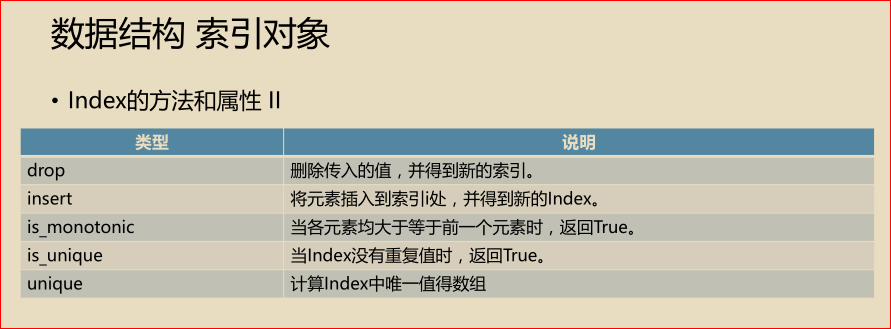

In [1]:
# DataFrame 删除元素，可指定索引或列
import pandas as pd
import numpy as np
data = pd.DataFrame(np.arange(16).reshape((4,4)),
                   index = ["Ohio","Colorado","Utah","New York"],
                   columns = ["one","two","three","four"])
print(data)

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


In [2]:
# 根据行索引删除指定的行
print(data.drop(["Colorado","Ohio"]))

          one  two  three  four
Utah        8    9     10    11
New York   12   13     14    15


In [3]:
# 根据列索引删除指定的列
print(data.drop("two",axis = 1))

          one  three  four
Ohio        0      2     3
Colorado    4      6     7
Utah        8     10    11
New York   12     14    15


In [4]:
print(data.drop(["two","four"],axis=1))

          one  three
Ohio        0      2
Colorado    4      6
Utah        8     10
New York   12     14


In [5]:
# 原始数据并没有改变
print(data)

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


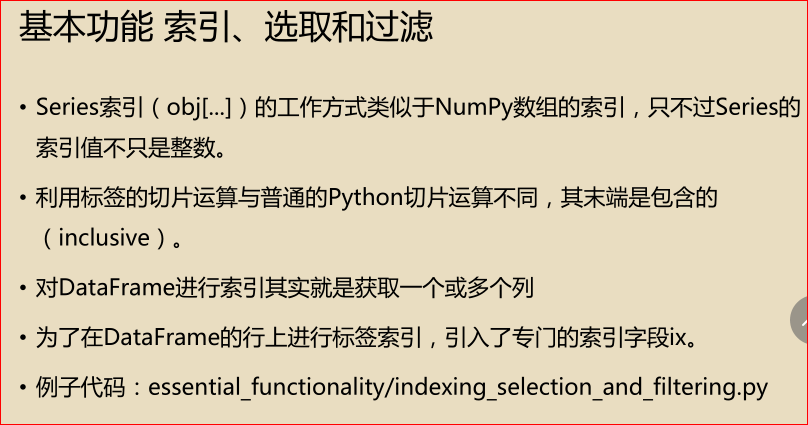

In [6]:
print(data < 5)

            one    two  three   four
Ohio       True   True   True   True
Colorado   True  False  False  False
Utah      False  False  False  False
New York  False  False  False  False


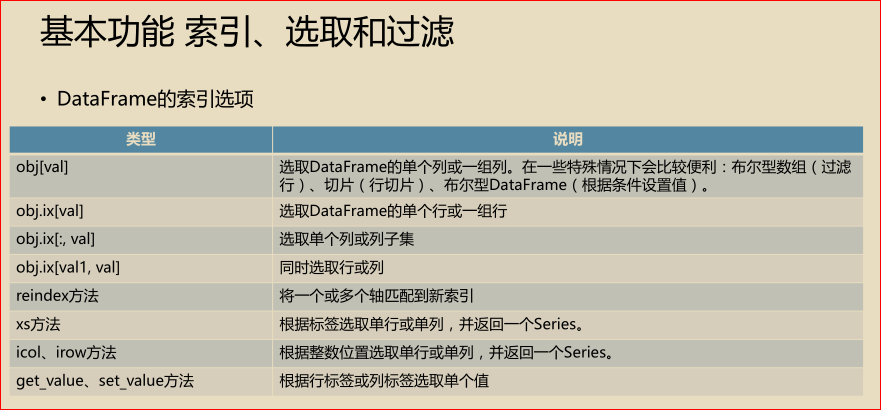